# Significance Test
* Hypothesis testing allows us to calculate the probability that random chance was actually responsibile for the difference in outcome.
* **Null hypothesis**, **alternative hypothesis**.
***
* Research design for a study is to find whether the results are **statistically significant**
* **Null hypothesis** should describe the default position of skepticism, which is that there's no statistically significant difference between the outcomes of the 2 groups, it should state that any difference is due to random choice. **Alternative hypothesis** should state that there is in fact a statistically significant difference between the outcomes of the 2 groups..
   * Null hypothesis: participants who consumed the weight loss pills lost the same amount of weight as those who didn't take the pill
   * Alternative hypothesis: participants who consumed the weight loss pills lost more weight than those who didn't take the pill.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('weight_loss.csv', header=None, names=['A', 'B'])
print(df.mean())

A    2.82
B    5.34
dtype: float64


In [3]:
weight_data = np.genfromtxt('weight_loss.csv', delimiter=',')

In [4]:
np.mean(weight_data, axis=0)

array([2.82, 5.34])

In [5]:
weight_data.mean(axis = 0)[0]

2.82

In [6]:
weight_lost_a = weight_data[:,0]
weight_lost_b = weight_data[:, 1]

In [7]:
mean_group_a = np.mean(weight_lost_a)
mean_group_b = np.mean(weight_lost_b)
print(mean_group_a, mean_group_b)

2.82 5.34


* To decide which hypothesis is more accurately describes the data, we need to frame the hypothesis more quantitatively.
* 1st step is to decide on a **test statistic**, which is a numerical value that summarize the data and we can use in statistical columns.
* We use this test statistic to run a statistical test that will determine how likely the difference between the groups were due to random choice.
* Null hypothesis: $\bar{x_b} - \bar{x_a} = 0$
* Alternative hypothesis: $\bar{x_b} - \bar{x_a} > 0$

In [8]:
mean_difference = mean_group_b - mean_group_a
print(mean_difference)

2.52


In [9]:
np.std(weight_lost_a, ddof=0)

1.6454786537661312

In [10]:
np.std(weight_lost_b, ddof = 0)

1.924681791881453

* The purpose of a statistical test is to work out the likelihood that the result we achieved was due to random chance.
* **permutation test** is a statistical test that involves simulating rerunning the study many times and recalculating the test statistic for eatch iteration. The distribution is called **sampling distribution**.

(array([  1.,   4.,  25.,  82., 194., 281., 224., 128.,  49.,  12.]),
 array([-1.75641026, -1.44876923, -1.14112821, -0.83348718, -0.52584615,
        -0.21820513,  0.0894359 ,  0.39707692,  0.70471795,  1.01235897,
         1.32      ]),
 <a list of 10 Patch objects>)

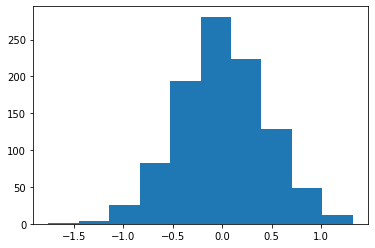

In [11]:
mean_differences = []
all_values = [3, 5, 2, 4, 3, 5, 4, 5, 3, 4, 2, 5, 2, 7, 2, 5, 1, 4, 3, 3, 2, 3, 3, 5, 1, 10, 3, 3, 4, 4, 1, 9, 3, 
              7, 2, 6, 1, 9, 3, 4, 4, 2, 3, 5, 2, 7, 3, 7, 7, 7, 2, 5, 3, 4, 2, 8, 5, 9, 1, 6, 1, 7, 1, 6, 3, 7, 2, 
              6, 4, 3, 10, 5, 2, 5, 3, 4, 2, 2, 5, 3, 6, 3, 2, 5, 3, 6, 2, 9, 3, 7, 4, 6, 1, 4, 3, 5, 3, 4, 1, 3]
for i in range(1000):
    group_a, group_b = [], []
    for value in all_values:
        r = np.random.rand() # generate a value between 0 and 1
        if r >= 0.5:
            group_a.append(value)
        else:
            group_b.append(value)
    mean_a = np.mean(group_a)
    mean_b = np.mean(group_b)
    iteration_mean_difference = mean_b - mean_a
    mean_differences.append(iteration_mean_difference)
plt.hist(mean_differences)

In [25]:
mean_differences

[0.4833933573429374,
 -0.17777777777777803,
 0.06364749082007393,
 -0.06364749082007393,
 -0.3115214773183461,
 0.2740384615384617,
 0.25442834138486337,
 0.6474358974358978,
 -0.33939393939393936,
 -0.05875152998776034,
 -0.4716442268461849,
 0.8878205128205132,
 -0.5634253701480594,
 0.26892109500805095,
 0.017951856385148623,
 -0.14524683802529648,
 0.2610837438423643,
 0.3200000000000003,
 -0.2946859903381638,
 -0.1968787515006003,
 -0.3569427771108442,
 -0.05656565656565604,
 0.24679487179487136,
 0.3035714285714284,
 0.046474358974359475,
 -0.046474358974359475,
 -0.3797979797979796,
 0.8735447611401046,
 0.13365539452496034,
 -0.39181051786431187,
 0.6920915295062224,
 0.6282467532467533,
 0.45122440786832607,
 0.2740384615384617,
 -0.0016977928692707422,
 -0.40000000000000036,
 -0.5083333333333333,
 0.7126436781609198,
 -0.0676328502415453,
 -0.30213464696223324,
 0.1403508771929829,
 0.23397435897435903,
 -0.3035714285714284,
 0.3896940418679553,
 0.1200000000000001,
 0.214170

In [12]:
np.std(mean_differences)

0.44669038757387225

In [13]:
empty = {}
key_a = empty.get('a', False)
empty['b'] = 'boat'
key_b = empty.get('b', False)
print(key_a, key_b)

False boat


In [14]:
#val = 0
empty = {'c':1}
if empty.get('c', False):
    # If in the dictionary, grab the value, increment by 1, reassign
    val = empty.get('c')
    inc = val + 1
    empty['c'] = inc
else:
    empty['c'] = 1

In [15]:
sampling_distribution = {}
for difference in mean_differences:
    if sampling_distribution.get(difference, False):
        sampling_distribution[difference] += 1
    else:
        sampling_distribution[difference] = 1

* Most of the values are closely centered around the mean difference of 0. This means that if it were purely up to chance, both groups would have lost the same amount of weight (the null hypothesis).
* **p value**, If p value is high, it means that the difference in the amount of weight both groups lost could have easily happened randomly and the weight loss pills probably didn't play a role.
* **p value threshold**
* In general, it's good practice to set the p value threshold before conducting the study:

   * if the p value is less than the threshold, we:
       * reject the null hypothesis that there's no difference in mean amount of weight lost by participants in both groups,
       * conclude that there is some evidence that the weight loss pill does affect the amount of weight people lost.

   * if the p value is greater than the threshold, we:
       * fail to reject the null hypothesis that there's no difference in the mean amount of weight lost by participants in both groups,
       * conclude that the weight loss pill doesn't seem to be effective in helping people lose more weight.


In [16]:
frequencies = []
for s in sampling_distribution:
    if s >= 2.52:
        frequencies.append(sampling_distribution[s])
p_value = np.sum(frequencies) / 1000

In [17]:
p_value

0.0

* Since the p value of 0 is less than the thershold we set of 0.05, we conclude that the difference in weight lost can't attributed to random chance alone. We therefore reject the null hypothesis.
* Research design is incredibly important and can bias your results. For example, if the participants in group A realized they were given placebo sugar pills, they may modify their behavior and affect the outcome.
***
* The p value threshold you set can also affect the conclusion you reach
   * If you set too high of a p value threshold, you may reject the null hypothesis incorrectly. This is known as a **type I error**
   * If you set too low of a p value threshold, you may fail to reject the null hypothesis incorrectly. This is known as a **type II error.**

# Chi-squared test
* Chi-squared test for categorical data. This test enable us to determine the statistical significance of observing a set of categorical values.
* The chi-squared test enable us to quantify the difference between sets of observed and expected categorical values.

In [18]:
df = pd.read_csv('income.csv')
df.sample(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
28336,59,Private,100453,7th-8th,4,Separated,Other-service,Own-child,Black,Female,0,0,38,United-States,<=50K
29389,30,Private,271933,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
10837,49,?,202874,HS-grad,9,Separated,?,Unmarried,White,Female,0,0,40,Columbia,<=50K


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  high_income     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [20]:
df.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [21]:
female_diff = (10771 - 16280.5) / 16280.5
male_diff = (21790 - 16280.5) / 16280.5
print(female_diff, male_diff)

-0.33841098246368356 0.33841098246368356


\begin{equation}
\frac{(observed - expected)^2}{expected}
\end{equation}
* Squaring the difference will ensure that all the differences don't sum to zero, to assess statistical significance.
* We can calculate $\chi^2$, the chi-squared value, by adding up all of the squared differences between observed and expected values.

In [23]:
female_diff = (10771 - 16280.5) ** 2 / 16280.5
male_diff = (21790 - 16280.5) ** 2 / 16280.5
gender_chisq = male_diff + female_diff

In [24]:
gender_chisq

3728.950615767329

We can generate a chi-squared sampling distribution using our expected probabilities. If we repeatedly generate random samples that contain 32561 samples, and graph the chi-squared value of each sample, we'll be able to generate a distribution. Here's a rough algorithm:

    Randomly generate 32561 numbers that range from 0-1.
    Based on the expected probabilities, assign Male or Female to each number.
    Compute the observed frequences of Male and Female.
    Compute the chi-squared value and save it.
    Repeat several times.
    Create a histogram of all the chi-squared values.

By comparing our chi-squared value to the distribution, and seeing what percentage of the distribution is greater than our value, we'll get a p-value. For instance, if 5% of the values in the distribution are greater than our chi-squared value, the p-value is .05.

(array([643., 184.,  74.,  51.,  19.,  13.,   5.,   2.,   5.,   4.]),
 array([3.07115875e-05, 9.52851571e-01, 1.90567243e+00, 2.85849329e+00,
        3.81131415e+00, 4.76413501e+00, 5.71695587e+00, 6.66977673e+00,
        7.62259759e+00, 8.57541845e+00, 9.52823930e+00]),
 <a list of 10 Patch objects>)

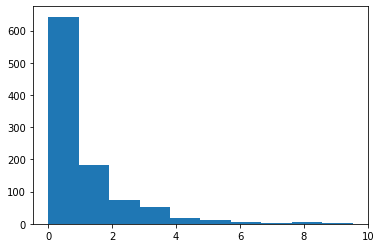

In [39]:
chi_squared_values = []
for _ in range(1000):
    random_array = np.random.random((32561,))
    #random_array[random_array < 0.5] = 0
    #random_array[random_array >= 0.5] = 1
    #male_count = len(random_array[random_array == 0])
    #female_count = len(random_array[random_array] == 1)
    count_0 = np.sum(random_array < 0.5)
    count_1 = random_array.size - count_0
    expected_value = 32561 / 2
    male_diff = (count_0 - expected_value) ** 2 / expected_value
    female_diff = (count_1 - expected_value) ** 2 / expected_value
    chi_squared_values.append((male_diff+ female_diff))
plt.hist(chi_squared_values)

* A significant value indicates that something is different between the observed and expected values, but it doesn't indicate what is different.
* As sample size changes, the chi-squared valued changes proportionally.

In [42]:
female_diff = (107.71 - 162.805) ** 2 / 162.805
male_diff = (217.90 - 162.805) ** 2 / 162.805
gender_chisq = female_diff + male_diff

* As sample sizes get larger, seeing large deviations from the expected probabilities gets less and less likely.

(array([662., 180.,  53.,  61.,  20.,   6.,  12.,   1.,   3.,   2.]),
 array([0.   , 0.972, 1.944, 2.916, 3.888, 4.86 , 5.832, 6.804, 7.776,
        8.748, 9.72 ]),
 <a list of 10 Patch objects>)

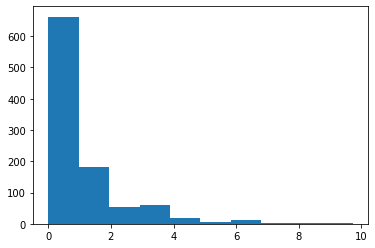

In [43]:
chi_squared_values = []
for _ in range(1000):
    random_number = np.random.random((300,))
    random_number[random_number < 0.5] = 0
    random_number[random_number >= 0.5] = 1
    count_male = len(random_number[random_number == 0])
    count_female = len(random_number[random_number == 1])
    male_diff = (count_male - 150) ** 2 / 150
    female_diff = (count_female - 150) ** 2 / 150
    chi_squared_values.append(male_diff + female_diff)
plt.hist(chi_squared_values)

## A degree of freedom is the number of values that can vary without the other values being 'locked in'. In the case of two categories, there is actually only one degree of freedom since the other value equals to total minus one value.

In [44]:
white_diff = (27816 - 26146.5) ** 2 / 26146.5
black_diff = (3124 - 3939.9) ** 2 / 3939.9
asian_diff = (1039 - 944.3) ** 2 / 944.3
amer_indian_diff= (311 - 260.5) ** 2 / 260.5
other_diff = (271 - 1269.8) ** 2 / 1269.8
race_chisq = white_diff + black_diff + asian_diff + amer_indian_diff + other_diff

In [45]:
diffs = []
observed = [27816, 3124, 1039, 311, 271]
expected = [26146.5, 3939.9, 944.3, 260.5, 1269.8]
for i in range(len(observed)):
    diffs.append((observed[i] - expected[i]) ** 2 / expected[i])
print(sum(diffs))

1080.485936593381


In [46]:
race_chisq

1080.485936593381

## scipy.stats.chisquare.

In [47]:
import numpy as np
from scipy.stats import chisquare

chisquare_value, p_value = chisquare(observed, expected)
print(chisquare_value, p_value)

1080.485936593381 1.2848494674873035e-232


In [48]:
chisquare(observed, expected)

Power_divergenceResult(statistic=1080.485936593381, pvalue=1.2848494674873035e-232)

In [56]:
chisquare([16,18,16,14,12,12])

Power_divergenceResult(statistic=2.0, pvalue=0.8491450360846096)

In [57]:
chisquare([16,18,16,14,12,12], f_exp=[16, 16,16,16,16,8])

Power_divergenceResult(statistic=3.5, pvalue=0.6233876277495822)

# Multi category chi-squared tests

In [59]:
total_people = 32561
males_over50k = .67 * .241 * total_people
males_under50k = .67 * .759 * total_people
females_over50k = .33 * .241 * total_people
females_under50k = .33 * .759 * total_people

In [60]:
observe = [6662, 15128, 1179, 9592]
expect = [males_over50k, males_under50k, females_over50k, females_under50k]
chisq_gender_income = sum([(observe[i] - expect[i]) ** 2 / expect[i] for i in range(4)])
chisq_gender_income

1520.0277713391151

In [61]:
chisquare(observe, expect)

Power_divergenceResult(statistic=1520.0277713391151, pvalue=0.0)

In [62]:
values = []
for o, e in zip(observe, expect):
    values.append((o-e)**2 / e)
sum(values)

1520.0277713391151

In [64]:
expect = np.array([5257.6, 2589.6, 16558.2, 8155.6])
observe = np.array([6662, 1179, 15128, 9592])

chisq, pvalue_gender_income = chisquare(f_obs = observe, f_exp = expect)

In [65]:
print(chisq, pvalue_gender_income)

1520.0362248035606 0.0


In [66]:
chisquare([207,282,231,242], [222.64, 266.36, 215.36, 257.64])

Power_divergenceResult(statistic=4.102261018097483, pvalue=0.25063140912343385)

## pandas.crosstab

In [67]:
import pandas as pd
table = pd.crosstab(df.sex, [df.high_income])
print(table)

high_income   <=50K   >50K
sex                       
 Female        9592   1179
 Male         15128   6662


In [68]:
pd.crosstab(df.sex, df.high_income)

high_income,<=50K,>50K
sex,,
Female,9592,1179
Male,15128,6662


In [71]:
df[['sex', 'high_income']].head()

,sex,high_income
0,Male,<=50K
1,Male,<=50K
2,Male,<=50K
3,Male,<=50K
4,Female,<=50K


In [77]:
df_sub = df[['sex', 'high_income']].copy()
df_sub['Sex'] = df_sub['sex']
df_sub.head()

,sex,high_income,Sex
0,Male,<=50K,Male
1,Male,<=50K,Male
2,Male,<=50K,Male
3,Male,<=50K,Male
4,Female,<=50K,Female


In [84]:
df_sub.groupby(['sex', 'high_income']).size().reset_index(name = 'count')

,sex,high_income,count
0,Female,<=50K,9592
1,Female,>50K,1179
2,Male,<=50K,15128
3,Male,>50K,6662


In [86]:
pd.crosstab(df_sub.sex, df_sub.high_income, margins=True)

high_income,<=50K,>50K,All
sex,,,
Female,9592,1179,10771
Male,15128,6662,21790
All,24720,7841,32561


In [89]:
sex_race = pd.crosstab(df.sex, df.race, margins = True)

In [90]:
sex_race

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,All
sex,,,,,,
Female,119,346,1555,109,8642,10771
Male,192,693,1569,162,19174,21790
All,311,1039,3124,271,27816,32561


## scipy.stats.chi2_contingency

In [97]:
from scipy.stats import chi2_contingency
observed = np.array([[5,5], [10,10]])
chi2_contingency(observed)[2]

1

In [92]:
chisq_value, pvalue, df, expected = chi2_contingency(pd.crosstab(df.sex, df.race))

In [94]:
print(chisq_value, pvalue, df, expected)

454.2671089131088 5.192061302760456e-97 4 [[  102.87709223   343.69549461  1033.40204539    89.64531188
   9201.3800559 ]
 [  208.12290777   695.30450539  2090.59795461   181.35468812
  18614.6199441 ]]



   * Finding that a result isn't significant doesn't mean that no association between the columns exists. For instance, if we found that the chi-squared test between the sex and race columns returned a p-value of .1, it wouldn't mean that there is no relationship between sex and race. It just means that there isn't a statistically significant relationship.
   * Finding a statistically significant result doesn't imply anything about what the correlation is. For instance, finding that a chi-squared test between sex and race results in a p-value of .01 doesn't mean that the dataset contains too many Females who are White (or too few). A statistically significant finding means that some evidence of a relationship between the variables exists, but needs to be investigated further.
   * Chi-squared tests can only be applied in the case where each possibility within a category is independent. For instance, the Census counts individuals as either Male or Female, not both.
   * Chi-squared tests are more valid when the numbers in each cell of the cross table are larger. So if each number is 100, great -- if each number is 1, you may need to gather more data.


In [98]:
chi2_contingency(np.array([[90,60, 104, 95], [30,50,51,20], [30,40,45,35]]))

(24.5712028585826,
 0.0004098425861096696,
 6,
 array([[ 80.53846154,  80.53846154, 107.38461538,  80.53846154],
        [ 34.84615385,  34.84615385,  46.46153846,  34.84615385],
        [ 34.61538462,  34.61538462,  46.15384615,  34.61538462]]))